# Bias-Variance Trade-Off - Lab

## Introduction

In this lab, you'll practice your knowledge on the bias-variance trade-off!

## Objectives

You will be able to: 
- Look at an example where Polynomial regression leads to overfitting
- Understand how bias-variance trade-off relates to underfitting and overfitting

## Let's get started!

We'll try to predict some movie revenues based on certain factors, such as ratings and movie year.

In [28]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_excel('./movie_data_detailed_with_ols.xlsx')
df.head()

,budget,domgross,title,Response_Json,Year,imdbRating,Metascore,imdbVotes,Model
0,13000000,25682380,21 &amp; Over,0,2008,6.8,48,206513,4.912759e+07
1,45658735,13414714,Dredd 3D,0,2012,0.0,0,0,2.267265e+05
2,20000000,53107035,12 Years a Slave,0,2013,8.1,96,537525,1.626624e+08
3,61000000,75612460,2 Guns,0,2013,6.7,55,173726,7.723381e+07
4,40000000,95020213,42,0,2013,7.5,62,74170,4.151958e+07


In [29]:
# Only keep four predictors and transform the with MinMaxScaler

scale = MinMaxScaler()
df = df[[ "domgross", "budget", "imdbRating", "Metascore", "imdbVotes"]]
transformed = scale.fit_transform(df)
pd_df = pd.DataFrame(transformed, columns = df.columns)
pd_df.head()
len(pd_df)

/opt/conda/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


30

## Split the data into a test and train set

In [30]:
# domgross is the outcome variable
X = pd_df[["budget", "imdbRating", "Metascore", "imdbVotes"]]
y = pd_df['domgross']

In [31]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split

In [32]:
#Your code here
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

## Fit a regression model to the training data and look at the coefficients

In [33]:
#Your code 
lin = LinearRegression()
lin_model = lin.fit(X_train, y_train)

In [34]:
lin_model.intercept_

0.0676338834629939

In [35]:
lin_model.coef_

array([ 0.40342808, -0.23152188,  0.1821635 ,  0.36614895])

## Plot the training predictions against the actual data (y_hat_train vs. y_train)

Let's plot our result for the train data. Because we have multiple predictors, we can not simply plot the income variable X on the x-axis and target y on the y-axis. Lets plot 
- a line showing the diagonal of y_train. The actual y_train values are on this line
- next, make a scatter plot that takes the actual y_train on the x-axis and the predictions using the model on the y-axis. You will see points scattered around the line. The horizontal distances between the points and the lines are the errors.

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
# your code here

y_hat_train = lin_model.predict(X_train)
y_hat_train

array([ 0.33462367,  0.46275405,  0.2512673 ,  0.22304987,  0.43183268,
        0.0848408 ,  0.33779301, -0.09027549,  0.12453944,  0.03040502,
        0.14643197,  0.4110746 ,  0.36453919,  0.10646435,  0.14144328,
        0.21141861,  0.35159579,  0.2008363 ,  0.58864787,  0.04409601,
        0.3244954 ,  0.12264992,  0.1593906 ,  0.18109058])

Text(0.5, 1.0, 'Training Data')

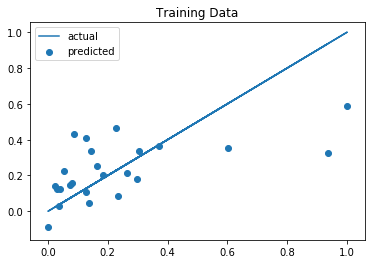

In [37]:
plt.scatter(y_train, y_hat_train, label = 'predicted')
plt.plot(y_train, y_train, label = 'actual')
plt.legend()
plt.title('Training Data')

## Plot the test predictions against the actual data (y_hat_test vs. y_test)

Do the same thing for the test data.

Text(0.5, 1.0, 'Test Data')

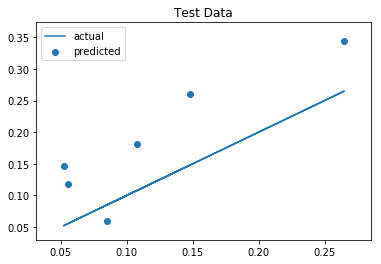

In [38]:
# your code here
y_hat_test = lin_model.predict(X_test)
y_hat_test
plt.scatter(y_test, y_hat_test, label = 'predicted')
plt.plot(y_test, y_test, label = 'actual')
plt.legend()
plt.title('Test Data')


## Calculate the bias
Write a formula to calculate the bias of a models predictions given the actual data: $Bias(\hat{f}(x)) = E[\hat{f}(x)-f(x)]$   
(The expected value can simply be taken as the mean or average value.)  


In [39]:
import numpy as np
def bias(y, y_hat):
    return np.mean(y_hat - y)

## Calculate the variance
Write a formula to calculate the variance of a model's predictions: $Var(\hat{f}(x)) = E[\hat{f}(x)^2] - \big(E[\hat{f}(x)]\big)^2$

In [40]:
def variance(y_hat):
    return np.mean([yi**2 for yi in y_hat]) - np.mean(y_hat)**2

## Use your functions to calculate the bias and variance of your model. Do this seperately for the train and test sets.

In [41]:
# code for train set bias and variance
train_bias = bias(y_train, y_hat_train)
train_var = variance(y_train)
print('Training bias = ', train_bias)
print('Training variance = ', train_var)

Training bias =  -4.394632805807911e-17
Training variance =  0.06720613703358144


In [42]:
# code for test set bias and variance
test_bias = bias(y_test, y_hat_test)
test_var = variance(y_test)
print('Test bias = ', test_bias)
print('Test variance = ', test_var)

Test bias =  0.06602687641427148
Test variance =  0.005313454826991873


## Describe in words what these numbers can tell you.

Your description here (this cell is formatted using markdown)<br>
There is low bias and high variance in the training set which means that the model is hitting the mark but with a wide range of predicted values;
The high bias but low variance in the test group means that the model is not hitting the mark but predicting values within a smaller variance range.

## Overfit a new model by creating additional features by raising current features to various powers.

Use `PolynomialFeatures` with degree 3. 

**Important note:** By including this, you don't only take polynomials of single variables, but you also combine variables, eg:

$ \text{Budget} * \text{MetaScore} ^ 2 $

What you're essentially doing is taking interactions and creating polynomials at the same time! Have a look at how many columns we get using `np.shape`. Quite a few!


In [43]:
from sklearn.preprocessing import PolynomialFeatures
# your code here
poly = PolynomialFeatures(3)
X_poly = poly.fit_transform(X_train)
reg_poly = LinearRegression().fit(X_poly, y_train)
X_poly.shape

(24, 35)

## Plot your overfitted model's training predictions against the actual data

Text(0.5, 1.0, 'Training Data w/ Polynomials')

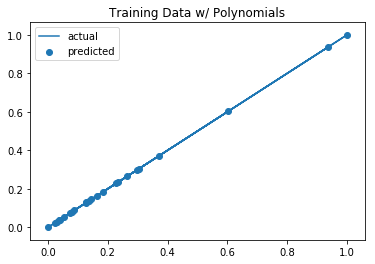

In [44]:
# your code here
plt.scatter(y_train, reg_poly.predict(X_poly), label = 'predicted')
plt.plot(reg_poly.predict(X_poly), reg_poly.predict(X_poly), label = 'actual')
plt.legend()
plt.title('Training Data w/ Polynomials')

Wow, we almost get a perfect fit!

## Calculate the bias and variance for the train set

In [49]:
# your code here
poly_bias = bias(y_train, reg_poly.predict(X_poly))
poly_var = variance(reg_poly.predict(X_poly))
print('Training bias = ', poly_bias)
print('Training variance = ', train_var)

Training bias =  -1.4409769673780677e-15
Training variance =  0.06720613703358144


## Plot your overfitted model's test predictions against the actual data.

In [50]:
# your code here
poly = PolynomialFeatures(3)
X_poly_test = poly.fit_transform(X_test)
reg_poly_test = LinearRegression().fit(X_poly_test, y_test)
X_poly_test.shape


(6, 35)

Text(0.5, 1.0, 'Test Data w/ Polynomials')

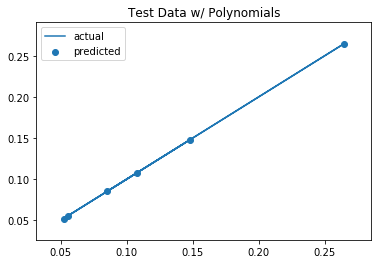

In [51]:
plt.scatter(y_test, reg_poly_test.predict(X_poly_test), label = 'predicted')
plt.plot(reg_poly_test.predict(X_poly_test), reg_poly_test.predict(X_poly_test), label = 'actual')
plt.xlim(0.00001,5)
plt.legend()
plt.title('Test Data w/ Polynomials')

##  Calculate the bias and variance for the test set.

In [52]:
# your code here
poly_bias_test = bias(y_test, reg_poly_test.predict(X_poly_test))
poly_var_test = variance(reg_poly_test.predict(X_poly_test))
print('Training bias = ', poly_bias_test)
print('Training variance = ', poly_var_test)

Training bias =  2.6599093298311043e-17
Training variance =  0.005313454826991887


## Describe what you notice about the bias and variance statistics for your overfit model

The bias and variance for the test set both increased drastically in the overfit model.

## Level Up - Optional

In this lab we went from 4 predictors to 35 by adding polynomials and interactions, using `PolynomialFeatures`. That being said, where 35 leads to overfitting, there are probably ways to improve by just adding a few polynomials. Feel free to experiment and see how bias and variance improve!

## Summary

This lab gave you insight in how bias and variance change for a training and test set by using a pretty "simple" model, and a very complex model. 